import libraries, dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dataset = 'transaction_dataset'

In [3]:
ethereum_df = pd.read_csv(f'data/raw/{dataset}.csv')

In [4]:
# dropping redundant columns
ethereum_df.drop(labels=['Unnamed: 0', 'Index'], axis=1, inplace=True)

**General statistics of dataset to look at**
- column type 
- continuous vs categorical vars 
- missing values 

**Dataset Column Description**
- Index: the index number of a row
- Address: the address of the ethereum account
- FLAG: whether the transaction is fraud or not
- Avg min between sent tnx: Average time between sent transactions for account in minutes
- Avg_min_between_received_tnx: Average time between received transactions for account in minutes
- Time_Diff_between_first_and_last(Mins): Time difference between the first and last transaction
- Sent_tnx: Total number of sent normal transactions
- Received_tnx: Total number of received normal transactions
- Number_of_Created_Contracts: Total Number of created contract transactions
- Unique_Received_From_Addresses: Total Unique addresses from which account received transactions
- Unique_Sent_To_Addresses20: Total Unique addresses from which account sent transactions
- Min_Value_Received: Minimum value in Ether ever received
- Max_Value_Received: Maximum value in Ether ever received
- Avg_Value_Received5Average value in Ether ever received
- Min_Val_Sent: Minimum value of Ether ever sent
- Max_Val_Sent: Maximum value of Ether ever sent
- Avg_Val_Sent: Average value of Ether ever sent
- Min_Value_Sent_To_Contract: Minimum value of Ether sent to a contract
- Max_Value_Sent_To_Contract: Maximum value of Ether sent to a contract
- Avg_Value_Sent_To_Contract: Average value of Ether sent to contracts
- Total_Transactions(Including_Tnx_to_Create_Contract): Total number of transactions
- Total_Ether_Sent:Total Ether sent for account address
- Total_Ether_Received: Total Ether received for account address
- Total_Ether_Sent_Contracts: Total Ether sent to Contract addresses
- Total_Ether_Balance: Total Ether Balance following enacted transactions
- Total_ERC20_Tnxs: Total number of ERC20 token transfer transactions
- ERC20_Total_Ether_Received: Total ERC20 token received transactions in Ether
- ERC20_Total_Ether_Sent: Total ERC20token sent transactions in Ether
- ERC20_Total_Ether_Sent_Contract: Total ERC20 token transfer to other contracts in Ether
- ERC20_Uniq_Sent_Addr: Number of ERC20 token transactions sent to Unique account addresses
- ERC20_Uniq_Rec_Addr: Number of ERC20 token transactions received from Unique addresses
- ERC20_Uniq_Rec_Contract_Addr: Number of ERC20token transactions received from Unique contract addresses
- ERC20_Avg_Time_Between_Sent_Tnx: Average time between ERC20 token sent transactions in minutes
- ERC20_Avg_Time_Between_Rec_Tnx: Average time between ERC20 token received transactions in minutes
- ERC20_Avg_Time_Between_Contract_Tnx: Average time ERC20 token between sent token transactions
- ERC20_Min_Val_Rec: Minimum value in Ether received from ERC20 token transactions for account
- ERC20_Max_Val_Rec: Maximum value in Ether received from ERC20 token transactions for account
- ERC20_Avg_Val_Rec: Average value in Ether received from ERC20 token transactions for account
- ERC20_Min_Val_Sent: Minimum value in Ether sent from ERC20 token transactions for account
- ERC20_Max_Val_Sent: Maximum value in Ether sent from ERC20 token transactions for account
- ERC20_Avg_Val_Sent: Average value in Ether sent from ERC20 token transactions for account
- ERC20_Uniq_Sent_Token_Name: Number of Unique ERC20 tokens transferred
- ERC20_Uniq_Rec_Token_Name: Number of Unique ERC20 tokens received
- ERC20_Most_Sent_Token_Type: Most sent token for account via ERC20 transaction
- ERC20_Most_Rec_Token_Type: Most received token for account via ERC20 transactions

note: imbalanced dataset == need to under/over sample later on before running models

In [5]:
ethereum_df.columns

Index(['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tn

In [6]:
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

In [7]:
ethereum_df.isnull().sum()

Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract              

In [8]:
ethereum_df['FLAG'].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [9]:
ethereum_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FLAG,9841.0,2.214206e-01,4.152241e-01,0.00,0.000000,0.000000e+00,0.000000,1.000000e+00
Avg min between sent tnx,9841.0,5.086879e+03,2.148655e+04,0.00,0.000000,1.734000e+01,565.470000,4.302877e+05
Avg min between received tnx,9841.0,8.004851e+03,2.308171e+04,0.00,0.000000,5.097700e+02,5480.390000,4.821755e+05
Time Diff between first and last (Mins),9841.0,2.183333e+05,3.229379e+05,0.00,316.930000,4.663703e+04,304070.980000,1.954861e+06
Sent tnx,9841.0,1.159317e+02,7.572264e+02,0.00,1.000000,3.000000e+00,11.000000,1.000000e+04
Received Tnx,9841.0,1.637009e+02,9.408366e+02,0.00,1.000000,4.000000e+00,27.000000,1.000000e+04
Number of Created Contracts,9841.0,3.729702e+00,1.414456e+02,0.00,0.000000,0.000000e+00,0.000000,9.995000e+03
Unique Received From Addresses,9841.0,3.036094e+01,2.986211e+02,0.00,1.000000,2.000000e+00,5.000000,9.999000e+03
Unique Sent To Addresses,9841.0,2.584016e+01,2.638204e+02,0.00,1.000000,2.000000e+00,3.000000,9.287000e+03
min value received,9841.0,4.384515e+01,3.259291e+02,0.00,0.001000,9.585600e-02,2.000000,1.000000e+04


In [10]:
cat_cols=ethereum_df.select_dtypes(include=['object']).columns.tolist()
num_cols = ethereum_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Address', ' ERC20 most sent token type', ' ERC20_most_rec_token_type']
Numerical Variables:
['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'Number of Created Contracts', 'Unique Received From Addresses', 'Unique Sent To Addresses', 'min value received', 'max value received ', 'avg val received', 'min val sent', 'max val sent', 'avg val sent', 'min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total transactions (including tnx to create contract', 'total Ether sent', 'total ether received', 'total ether sent contracts', 'total ether balance', ' Total ERC20 tnxs', ' ERC20 total Ether received', ' ERC20 total ether sent', ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr', ' ERC20 uniq rec addr', ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr', ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', '

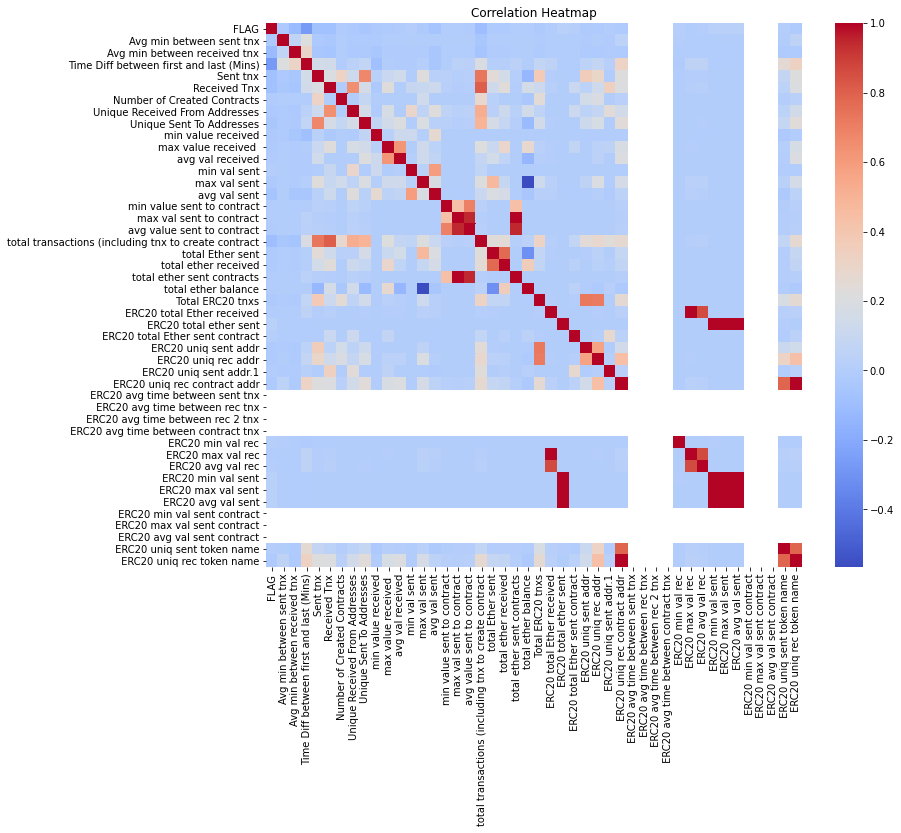

In [13]:
correlation_matrix = ethereum_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
df_num_corr = correlation_matrix['FLAG'][1:] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with FLAG:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with FLAG:
Series([], Name: FLAG, dtype: float64)


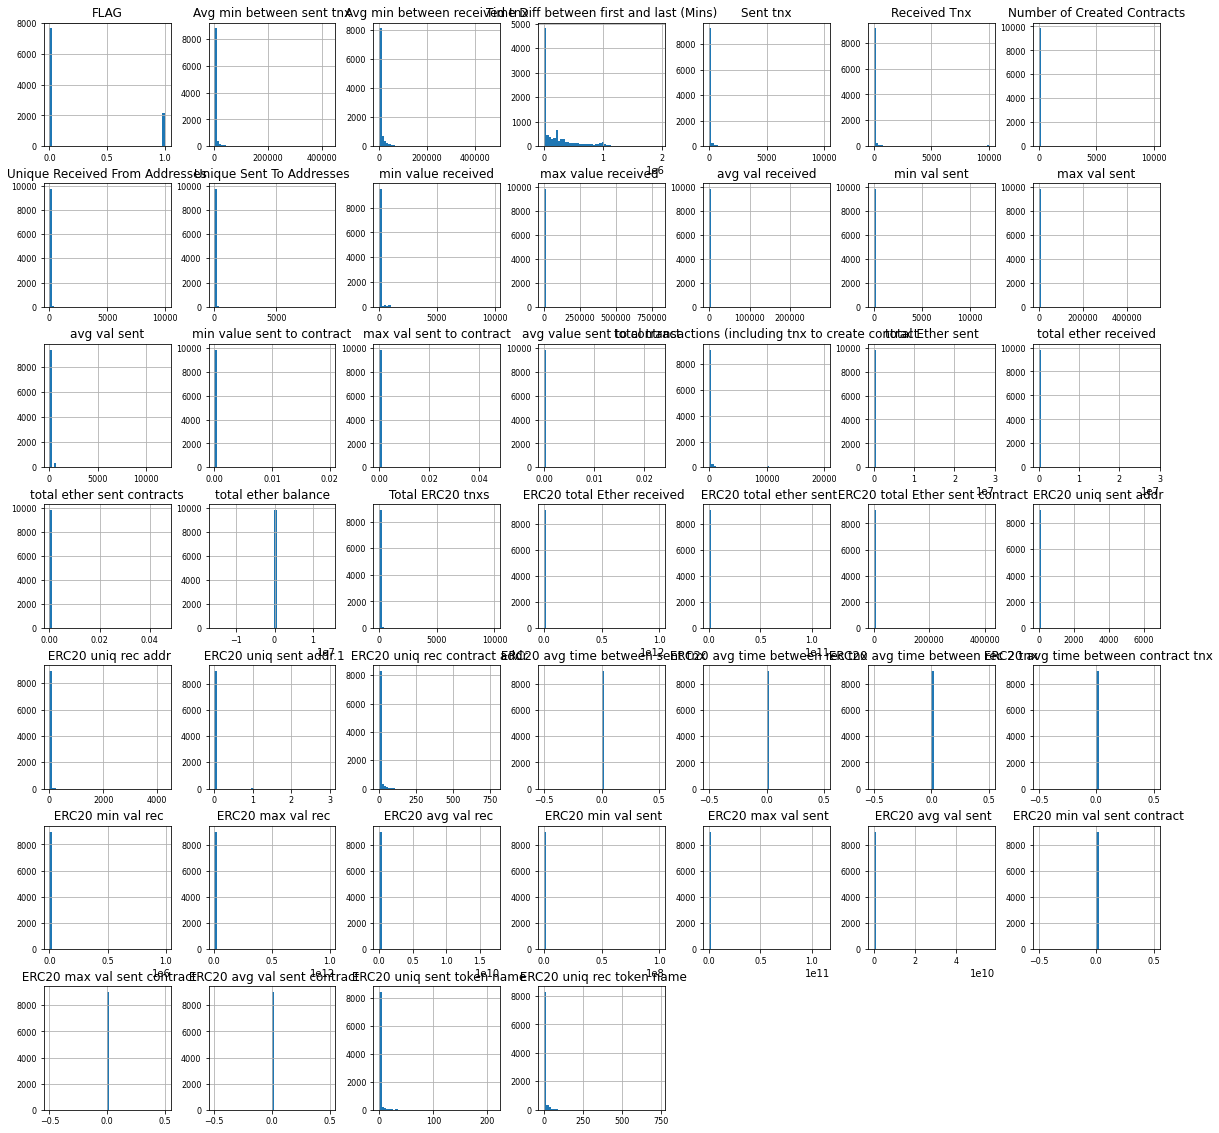

In [35]:
df_num = ethereum_df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8); 

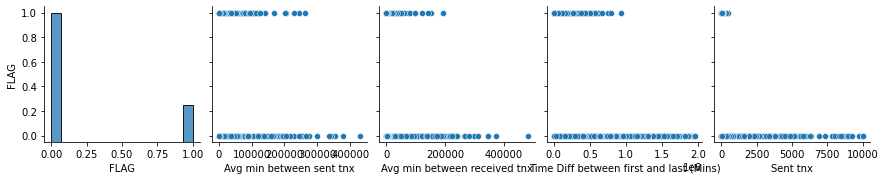

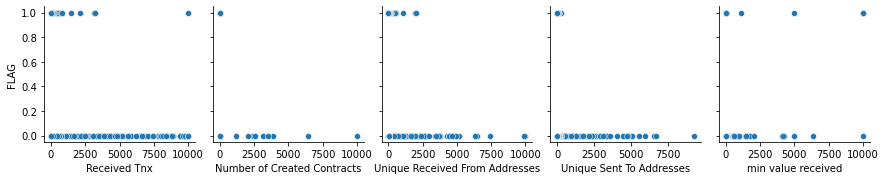

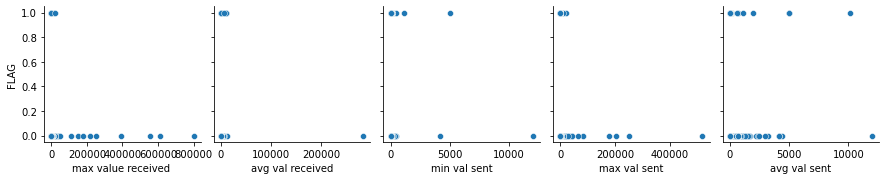

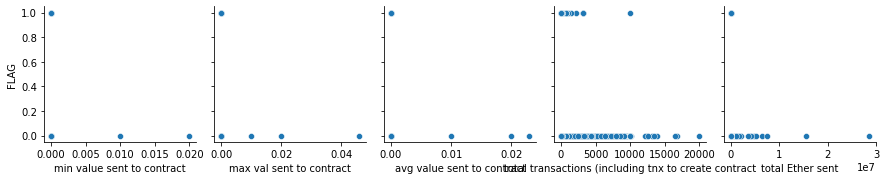

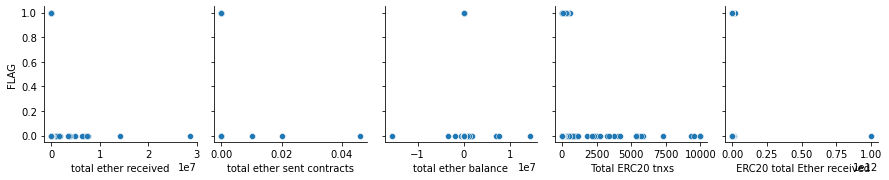

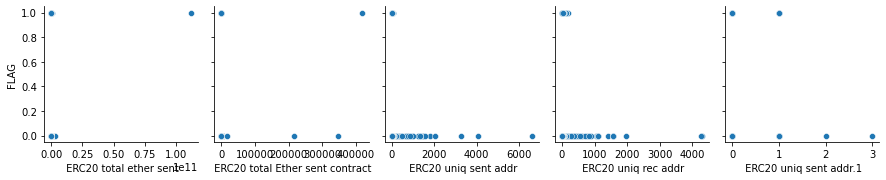

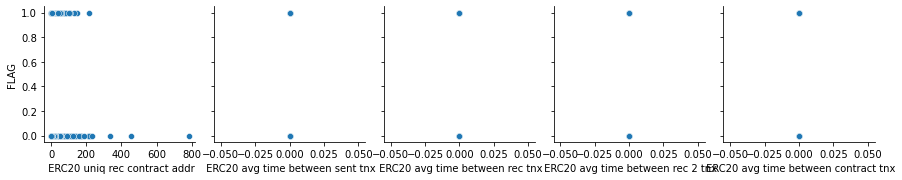

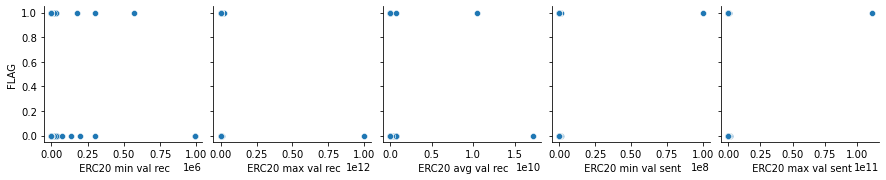

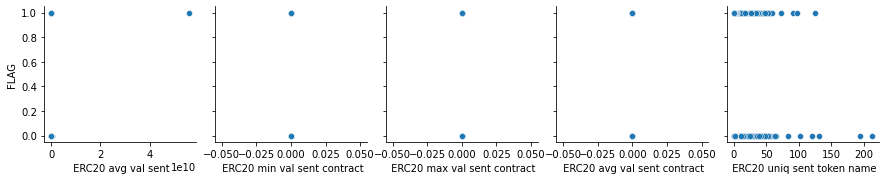

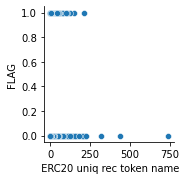

In [40]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['FLAG'])

In [44]:
import operator

individual_features_df = []
for i in range(1, len(df_num.columns)): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'FLAG']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['FLAG'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

Time Diff between first and last (Mins): -0.22002850851064396
 ERC20 uniq rec token name: -0.1524058622991505
 ERC20 uniq rec contract addr: -0.15037164449559576
Avg min between received tnx: -0.11942642975490467
 ERC20 uniq sent addr.1: -0.10700645625096356
total transactions (including tnx to create contract: -0.08726642116358549
       Sent tnx: -0.07441552462992772
   Received Tnx: -0.06780739458000136
 Total ERC20 tnxs: -0.06392683632316333
 ERC20 uniq rec addr: -0.06009021150343783
   avg val sent: -0.052005229376158014
Unique Sent To Addresses: -0.042203732603608504
 ERC20 uniq sent addr: -0.037983671891896956
Number of Created Contracts: -0.02715053323132715
Unique Received From Addresses: -0.023439466336392076
   max val sent: -0.020929974220451588
max value received : -0.01613628997554723
total ether received: -0.01466896600681463
total Ether sent: -0.014461141150953602
 ERC20 total Ether received: -0.010302545207014608
avg val received: -0.008416727630883874
min value receiv

In [45]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with FLAG:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with FLAG:
[]


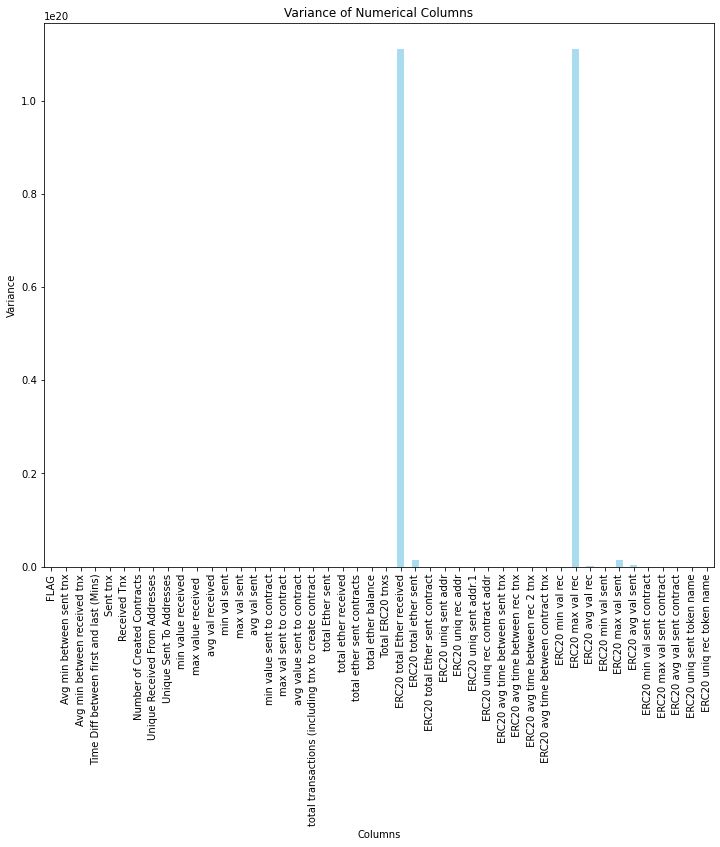

In [26]:
# variance
plt.figure(figsize=(12, 10))
ethereum_df.var().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Variance of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.xticks(rotation=90) 
plt.show()

Text(0.5, 0.98, 'Avg min between sent tnx vs Fraud Class')

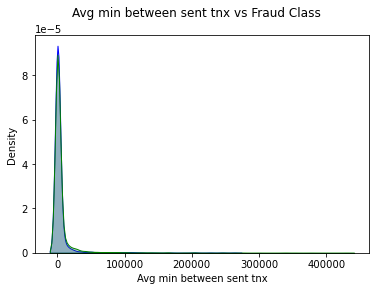

In [11]:
# a few typical density plots 
fig, ax = plt.subplots()

sns.kdeplot(ethereum_df[ethereum_df["FLAG"]==1]["Avg min between sent tnx"], shade=True, color="blue", label="Fraudulent", ax=ax)
sns.kdeplot(ethereum_df[ethereum_df["FLAG"]==0]["Avg min between sent tnx"], shade=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Avg min between sent tnx")
ax.set_ylabel("Density")

fig.suptitle("Avg min between sent tnx vs Fraud Class")

Text(0.5, 0.98, 'Avg min between received tnx vs Fraud Class')

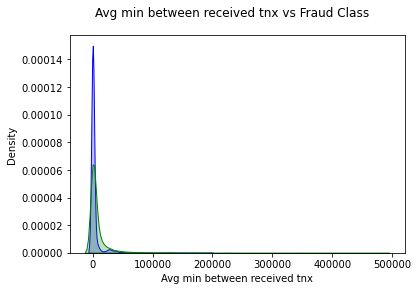

In [12]:
# a few typical density plots 
fig, ax = plt.subplots()

sns.kdeplot(ethereum_df[ethereum_df["FLAG"]==1]["Avg min between received tnx"], shade=True, color="blue", label="Fraudulent", ax=ax)
sns.kdeplot(ethereum_df[ethereum_df["FLAG"]==0]["Avg min between received tnx"], shade=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Avg min between received tnx")
ax.set_ylabel("Density")

fig.suptitle("Avg min between received tnx vs Fraud Class")

Text(0.5, 0.98, 'ERC20 total Ether received vs Fraud Class')

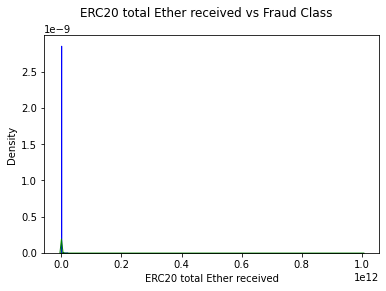

In [27]:
# a few typical density plots 
fig, ax = plt.subplots()

sns.kdeplot(ethereum_df[ethereum_df["FLAG"]==1][" ERC20 total Ether received"], shade=True, color="blue", label="Fraudulent", ax=ax)
sns.kdeplot(ethereum_df[ethereum_df["FLAG"]==0][" ERC20 total Ether received"], shade=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("ERC20 total Ether received")
ax.set_ylabel("Density")

fig.suptitle("ERC20 total Ether received vs Fraud Class")